In [2]:
# Freqtrade Workspace

# Notebook Helper
%load_ext autoreload
%autoreload 2
%env WANDB_SILENT=true

# Standard Imports
from pathlib import Path
from typing import List, Callable, Tuple, Any
from wandb.wandb_run import Run
from datetime import datetime, timedelta
import attr
import gc
import os
import wandb
import nest_asyncio
import logging
import sys
import pandas as pd
import numpy as np

# Resolve CWD
gc.collect()
nest_asyncio.apply()

while "freqtrade" not in os.listdir():
    os.chdir("..")
    if "freqtrade" in os.listdir():
        nest_asyncio.apply()
        logger = logging.getLogger("freqtrade.ml")
        handler = logging.StreamHandler(stream=sys.stdout)
        handler.setFormatter(logging.Formatter("%(name)s - %(message)s"))
        logger.addHandler(handler)
        logger.setLevel(logging.DEBUG)

# Freqtrade Imports
from freqtrade.optimize.optimize_reports import text_table_add_metrics
from freqtrade.ml.lightning import LightningModule, LightningConfig
from freqtrade.ml.trainer import TradingTrainer
from freqtrade.ml.container import LightningContainer
from freqtrade.ml import loader, lightning_utils
from freqtrade.nbtools.preset import LocalPreset, ConfigPreset, FilePreset, CloudPreset
from freqtrade.nbtools.backtest import backtest
from freqtrade.nbtools import plotting, configs
from freqtrade.nbtools.helper import free_mem
from freqtrade.nbtools.pairs import PAIRS_HIGHCAP_NONSTABLE

# Constants
PATH_MOUNT = Path.cwd().parent / "mount"
PATH_DATA = PATH_MOUNT / "data" / "binance"
PATH_PRESETS = PATH_MOUNT / "presets"

# Define custom functions
def foo() -> str:
    return "bar"

env: WANDB_SILENT=true
Working Directory: C:\CS\Python\crypto-collection\freqtrade\superft


In [ ]:
TIMERANGE = "20210101-"

preset = ConfigPreset(
    name="CONFIGPRESET",
    config_dict=configs.DEFAULT,
    timerange=TIMERANGE,
    path_data=PATH_DATA,
)

# NOTE: Optional!
# preset.overwrite_config(pairs=PAIRS_BLVT_DOWN)

stats, summary = backtest(preset, preset.default_strategy_code)
trades = pd.DataFrame(stats["strategy"]["NotebookStrategy"]["trades"])

Backtesting...


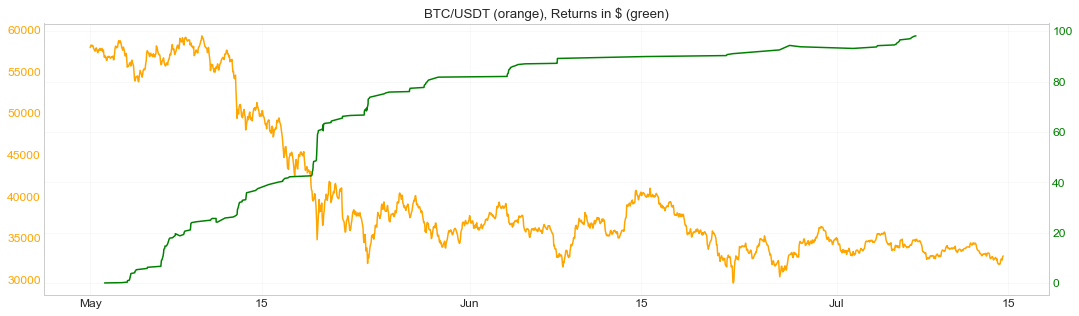

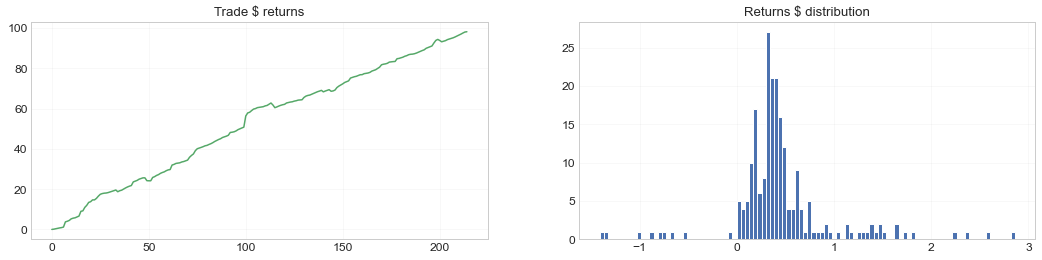

Portfolio Summary
------------------------------
Min Balance          : 0.02
Max Balance          : 98.18
End Balance          : 98.18
------------------------------
Trades               : 215
Avg. Profit %        : 3.04%
Avg. Profit $        : 0.46
Biggest Profit $     : 5.55
Biggest Loss $       : -1.41
------------------------------


In [14]:
plotting.plot_profits(
    trades,
    start = "2021-05-01",
    end = "2021-08-01",
    path_mount = PATH_MOUNT
)

In [15]:
# Running this cell will print backtest results
results = stats["strategy"]["NotebookStrategy"]

# Results per pair
results_per_pair = pd.DataFrame(results["results_per_pair"])
results_per_pair_df = results_per_pair.set_index("key").drop(columns=["profit_mean", "profit_total"])
results_per_pair_df = results_per_pair_df.sort_values(by=["profit_total_abs"], ascending=False)
results_per_pair_df.round(2)

# Sell reason stats
sells = pd.DataFrame(results['sell_reason_summary'])
sells = sells.drop(columns=["profit_mean", "profit_total"]).set_index("sell_reason")

# Left open trades
left_open_trades = pd.DataFrame(results['left_open_trades'])
left_open_trades = left_open_trades.drop(columns=["profit_mean", "profit_total"]).set_index("key")

# Summary metrics
metrics = text_table_add_metrics(results)

# Advanced metrics
with (preset_local.path_local_preset / "metadata.json").open("r") as fs:
    advanced_metrics = json.load(fs)
    advanced_metrics["profit_mean"] = advanced_metrics["profit_mean"] * 100
    advanced_metrics["profit_median"] = advanced_metrics["profit_median"] * 100
    advanced_metrics["profit_total"] = advanced_metrics["profit_total"] * 100

for key, value in advanced_metrics.items():
    if isinstance(value, float):
        advanced_metrics[key] =  round(value, 3)
    advanced_metrics[key] = [advanced_metrics[key]]
    
advanced_metrics_df = pd.DataFrame(advanced_metrics)
    
print("Results Per Pair")
display(results_per_pair_df.round(2))
print("Sell Reasons")
display(sells.round(2))
print("Left Open Trades")
display(left_open_trades.round(2))
print("Freqtrade Summary Metrics")
print("=" * 48 + "\n" + metrics + "\n" + "=" * 48)
print("Advanced Metrics")
print("Preset Name:", advanced_metrics_df["preset_name"][0])
display(advanced_metrics_df.drop(columns=["preset_name", "pairlist"]).T)

Results Per Pair


,trades,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,,
TOTAL,215,3.04,6.54,653.87,98.18,9.82,3:15:00,206,0,9
MATIC/USDT,19,4.27,0.81,81.11,12.18,1.22,1:06:00,19,0,0
KSM/USDT,8,8.54,0.68,68.34,10.26,1.03,3:14:00,8,0,0
DOGE/USDT,13,3.94,0.51,51.27,7.70,0.77,1:50:00,13,0,0
NANO/USDT,8,4.80,0.38,38.37,5.76,0.58,5:08:00,8,0,0
ETC/USDT,8,3.93,0.31,31.40,4.71,0.47,1:52:00,8,0,0
EOS/USDT,4,7.52,0.30,30.07,4.51,0.45,2:36:00,4,0,0
ADA/USDT,8,3.29,0.26,26.36,3.96,0.40,1:48:00,8,0,0
SUSHI/USDT,9,2.55,0.23,22.92,3.44,0.34,0:28:00,9,0,0


Sell Reasons


,trades,wins,draws,losses,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct
sell_reason,,,,,,,,,
signal_profit_u_1,65,65,0,0,2.44,1.59,158.62,23.82,26.44
signal_profit_u_e_1,22,22,0,0,1.16,0.26,25.53,3.83,4.25
signal_profit_0,20,20,0,0,1.38,0.28,27.67,4.15,4.61
signal_profit_u_2,15,15,0,0,3.46,0.52,51.91,7.79,8.65
signal_profit_p_d_1,12,12,0,0,1.25,0.15,15.02,2.26,2.50
signal_profit_l_1,8,8,0,0,3.25,0.26,25.97,3.90,4.33
sell_signal,8,8,0,0,8.78,0.70,70.21,10.54,11.70
signal_profit_u_3,8,8,0,0,4.37,0.35,34.93,5.25,5.82
signal_profit_1,7,7,0,0,2.45,0.17,17.12,2.57,2.85


Left Open Trades


,trades,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,,
OMG/USDT,1,0.94,0.01,0.94,0.14,0.01,"1 day, 1:40:00",1,0,0
TOTAL,1,0.94,0.01,0.94,0.14,0.01,"1 day, 1:40:00",1,0,0


Freqtrade Summary Metrics
| Metric                 | Value               |
|------------------------+---------------------|
| Backtesting from       | 2021-05-01 00:00:00 |
| Backtesting to         | 2021-07-07 11:05:00 |
| Max open trades        | 6                   |
|                        |                     |
| Total/Daily Avg Trades | 215 / 3.21          |
| Starting balance       | 1000.000 USDT       |
| Final balance          | 1098.179 USDT       |
| Absolute profit        | 98.179 USDT         |
| Total profit %         | 9.82%               |
| Avg. stake amount      | 15.000 USDT         |
| Total trade volume     | 3225.000 USDT       |
|                        |                     |
| Best Pair              | MATIC/USDT 81.11%   |
| Worst Pair             | LUNA/USDT -6.73%    |
| Best trade             | KSM/USDT 36.98%     |
| Worst trade            | HNT/USDT -9.4%      |
| Best day               | 18.759 USDT         |
| Worst day              | -1.455 USDT     

,0
backtest_date,2021-07-14 21:48:07
leverage,1
direction,long
is_hedging,False
num_pairs,62
data_source,binance
win_rate,0.958
avg_profit_winners_abs,0.513
avg_profit_losers_abs,-0.824
sum_profit_winners_abs,105.596
